# Confidence Intervals

Confidence intervals are a way to quantify the how certain we are about a population parameter. 

For example:

- I am 95% sure that the graduation rate of IH students is between 70 and 90%;

- I am 60% certain that the average age of the Dutch population is between 40 and 50;

- I am 99.9% sure that your  graduation rate will  between 99% and 100%;

These are all statements about a property of the population: the mean. We do not know this property exactly, we can construct a 'ballpark'.

In this lecture we will learn how to create such quantitative statements about our data. In particular you will learn about:

- Z-scores;

- Margin of error;


- The t-distribution;

- T-scores;

- Confidence intervals.

As usual, let's import the necessary libraries. 

In [1]:
import math
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import pandas as pd
sns.set_style("darkgrid") 

%matplotlib inline

## The Gaussian: A Recap

Before moving on, let's first do a quick recap of the Gaussian. 

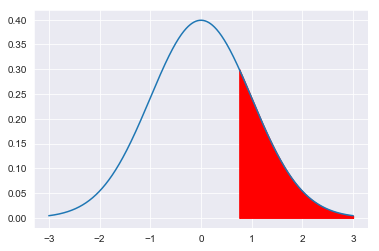

In [2]:
normal = norm(loc = 0, scale = 1) 
fig, ax = plt.subplots(1, 1)
x = np.linspace(-3,3,1000)        # Return evenly spaced numbers over a specified interval.
y = norm.pdf(x)
ax.plot(x,y)
plt.fill_between(x,y, where = x >= 0.75, color='r')
plt.show()

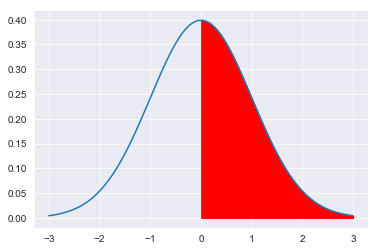

In [6]:
normal = norm(loc = 0, scale = 1) 
fig, ax = plt.subplots(1, 1)
x = np.linspace(-3,3,1000)        # Return evenly spaced numbers over a specified interval.
y = norm.pdf(x)
ax.plot(x,y)
plt.fill_between(x,y, where = x >= -0.75, color='r')
plt.show()

## Confidence Intervals: Known Population Standard Deviation

## The z-score

If we want to compute how much of the data is between two points on the x-axis, we can compute a so called z-score. 

This z-score is simply a cut-off value that captures some percentage of the data under the curve.

### General Version of a z-score for a Standard Gaussian

Computing the z-score for a generic normal distribution is simple. We can use scipy for that. 

The function below gives us two values: one for the left side of the normal curve and another for the right side of the normal curve. The 0.95 indicates that we want to take 95% of the area under curve.

In [9]:
z = stats.norm.interval(0.95)
print(z) 

(-1.959963984540054, 1.959963984540054)


It is also possible to get just one value for z. 

In [14]:
z = stats.norm.interval(0.95)[1]
print(z)

1.959963984540054


As can be seen in the plot below, the-z score gives us 95% of the values in the normal distribution.

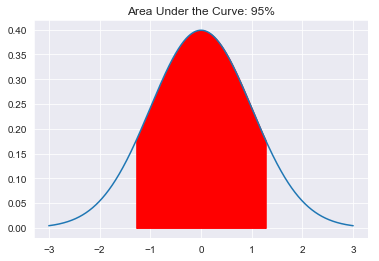

In [13]:
normal = norm(loc = 0, scale = 1) 
fig, ax = plt.subplots(1, 1)
x = np.linspace(-3,3,1000)        
y = norm.pdf(x)
ax.plot(x,y)

plt.title('Area Under the Curve: 95%')
plt.fill_between(x,y, where = (x<=z) & (x>=-z), color='r')
plt.show()

It is also possible to select other parts of the curve such as  2.5% of the data on the right side. 

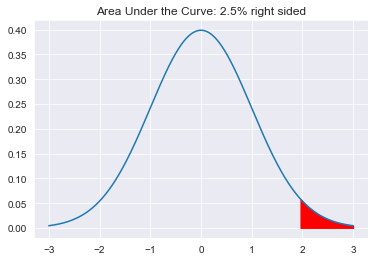

In [15]:
normal = norm(loc = 0, scale = 1) 
fig, ax = plt.subplots(1, 1)
x = np.linspace(-3,3,1000)        # Return evenly spaced numbers over a specified interval.
y = norm.pdf(x)
ax.plot(x,y)
plt.fill_between(x,y, where = x >= z, color='r')
plt.title('Area Under the Curve: 2.5% right sided')
plt.show()

In similar vein, we can also display 5% of the data in both tails.

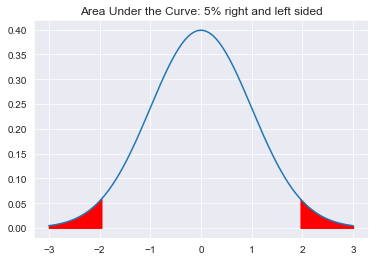

In [16]:
normal = norm(loc = 0, scale = 1) 
fig, ax = plt.subplots(1, 1)
x = np.linspace(-3,3,1000)        # Return evenly spaced numbers over a specified interval.
y = norm.pdf(x)
ax.plot(x,y)
plt.fill_between(x,y, where = x >= z, color='r')
plt.fill_between(x,y, where = x <=-z, color='r')
plt.title('Area Under the Curve: 5% right and left sided')
plt.show()

Thus, the z-score is simply a value that demarcates the beginning (or end) of some percentage of the data. 

By analogy, the median is the cut-off value for 50% of the data.

In [17]:
median = norm(loc = 0, scale = 1).median()

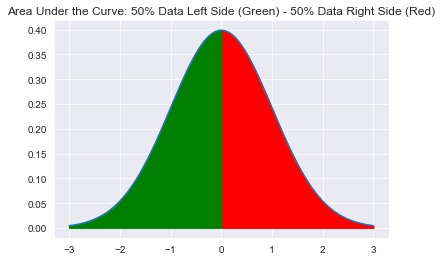

In [18]:
normal = norm(loc = 0, scale = 1) 
fig, ax = plt.subplots(1, 1)
x = np.linspace(-3,3,1000)        
y = norm.pdf(x)
ax.plot(x,y)
plt.fill_between(x,y, where = x >= median, color='r')
plt.fill_between(x,y, where = x <=-median, color='g')
plt.title('Area Under the Curve: 50% Data Left Side (Green) - 50% Data Right Side (Red)')
plt.show()

### Modified Version for a Data Sample

In real life, however, we do not encounter the perfect normal distribution, as we work with limited data. However, we can also compute z-scores for distributions with different from 0. 

**Important:** In the following examples, we assume that we know the standard deviation *of the population*. Later on we will see what to do when we do not know the population standard deviation.

### Example: US Presidents

Let us now have a look at the US presidents data set. 

In [19]:
presidents = pd.read_csv('https://raw.githubusercontent.com/loukjsmalbil/datasets_ws/master/presidents_heights.csv')
heights = presidents['height(cm)'] 
stdev_presidents = heights.std()

In the previous lecture we simply sampled 1000 times. Let's do that here as well and see what we get.

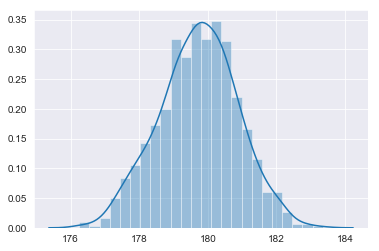

In [20]:
number_of_samples = 1000
sample_size = 20
sample_means = []

for i in range(number_of_samples):
    sample = heights.sample(n=sample_size)
    sample_means.append(sample.mean())
    
sns.distplot(sample_means)

Now suppose that we want to compute the z-score for this particular distribution. How to proceed?

We can adjust the z-score of a standard normal distribution (with mean = 0 and stdev = 1), by simply adding (or subtracting) the z-score to the sample mean.

In [21]:
# Right
z_adjusted_for_presidents_right = np.mean(sample_means) + stats.norm.interval(0.95)[1] 
print(z_adjusted_for_presidents_right)

181.68396398454004


In [22]:
# Left
z_adjusted_for_presidents_left = np.mean(sample_means) - stats.norm.interval(0.95)[1] 
print(z_adjusted_for_presidents_left)

177.76403601545994


Let us now plot the distribution of the sample means with the z-scores.

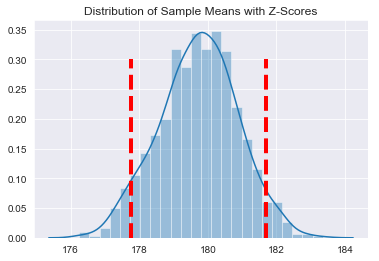

In [23]:
sns.distplot(sample_means)
plt.plot([z_adjusted_for_presidents_right, z_adjusted_for_presidents_right], [0, 0.3], 'k--', lw=4, color='r')
plt.plot([z_adjusted_for_presidents_left, z_adjusted_for_presidents_left], [0, 0.3], 'k--', lw=4, color='r')
plt.title('Distribution of Sample Means with Z-Scores')
plt.show()

Let's now see how this plot changes if we increase the sample size by 10 to 30.

In [24]:
number_of_samples = 1000
sample_size = 30
sample_means = []

for i in range(number_of_samples):
    sample = heights.sample(n=sample_size)
    sample_means.append(sample.mean())


In [25]:
z_adjusted_for_presidents_right = np.mean(sample_means) + stats.norm.interval(0.95)[1] 
z_adjusted_for_presidents_left = np.mean(sample_means) - stats.norm.interval(0.95)[1] 

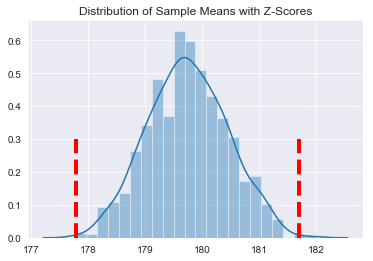

In [26]:
sns.distplot(sample_means)
plt.plot([z_adjusted_for_presidents_right, z_adjusted_for_presidents_right], [0, 0.3], 'k--', lw=4, color='r')
plt.plot([z_adjusted_for_presidents_left, z_adjusted_for_presidents_left], [0, 0.3], 'k--', lw=4, color='r')
plt.title('Distribution of Sample Means with Z-Scores')
plt.show()

As can be observed, more data is now located between the dotted lines. 

This indicates that there is *less* variability when we increase the sample size, since there is fewer dispersion.


In order to capture 95% of the data, we could now move the red line on the left a bit to the right and the one on the right a bit to the left.

We would obtain something like this: 

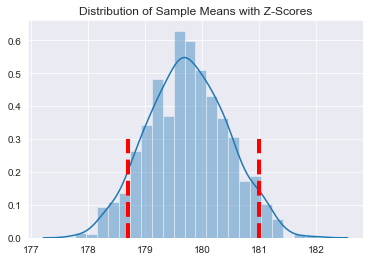

In [50]:
sns.distplot(sample_means)
plt.plot([178.7, 178.7], [0, 0.3], 'k--', lw=4, color='r')
plt.plot([181, 181], [0, 0.3], 'k--', lw=4, color='r')
plt.title('Distribution of Sample Means with Z-Scores')
plt.show()

The important thing to note here is that the window of possible values for the mean has decreased.

Thus, in a normal, perfect Gaussian world the, z-score would provide us with a simple cut-off value that tells us which the percentage of data that is between these two z-scores. 

In reality, however, the z-score by itself will not be enough as with the increase of data points (i.e. sample size), the dispersion decreases. (Recall the CLT) 

For this reason, we need to factor in the variability that comes with the size of the sample. 

### Margin of Error

We can incorporate this notion of an increase (or descrease) in sample size using a term called the **margin of error**.

The margin of error is simply a measure that tells us how much the data deviates from the mean. As such, the margin of error decreases as the sample size increases. 

The margin of error can be defined as the standard deviation of the population divided by the square root of the sample size. 

Before moving on, let us first examine the margin of error in general and see how it behaves as the sample size increases.

/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


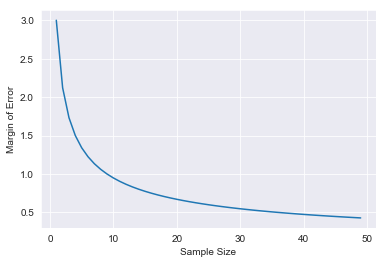

In [56]:
standard_deviation = 3
sample_sizes = 50
margin_error_compounded = []

for i in range(sample_sizes):
    margin_error = standard_deviation/np.sqrt(i)    
    margin_error_compounded.append(margin_error)
    
plt.ylabel('Margin of Error')
plt.xlabel('Sample Size')
sns.lineplot(data=pd.Series(margin_error_compounded))
plt.show()

It's pretty neat to see that regardless of the standard deviation of the population, the margin of error decreases as the sample size increases. 

Let's now look at the margin of error in action.

### Margin of Error for US Presidents

Let's revisit the previous example and compute the margin of error for this data.

**Important**: Note that from now on we're going to work with single samples of a given size.

In [58]:
presidents = pd.read_csv('https://raw.githubusercontent.com/loukjsmalbil/datasets_ws/master/presidents_heights.csv')
heights = presidents['height(cm)']
stdev_presidents = heights.std()
sample_size = 30

We can compute the margin of error for a sample size of 30 as follows:

In [59]:
marg_of_error = stdev_presidents / np.sqrt(sample_size)
print(marg_of_error)

1.2809165441925627


Let's now review how the sample size behaves when we gradually increase the sample size from 0 to 40.

/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


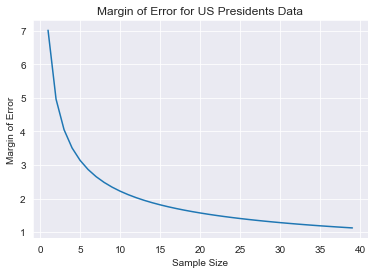

In [60]:
sample_sizes = 40
margin_error_compounded = []

for i in range(sample_sizes):
    margin_error = stdev_presidents/np.sqrt(i)
    margin_error_compounded.append(margin_error)
    
plt.title('Margin of Error for US Presidents Data')
plt.ylabel('Margin of Error')
plt.xlabel('Sample Size')
sns.lineplot(data=pd.Series(margin_error_compounded))
plt.show()

Thus, if we take, say, a sample of size 5, the error is potentially pretty large and we need to factor in this uncertainty. 

In [61]:
marg_of_error = stdev_presidents / np.sqrt(5)
print('The margine of error for a sample size of 5: ' + str(marg_of_error))

The margine of error for a sample size of 5: 3.1375919363609577


By contrast, a larger sample size causes the margin of error to decrease.

In [62]:
marg_of_error = stdev_presidents / np.sqrt(20)
print('The margine of error for a sample size of 20: ' + str(marg_of_error))

The margine of error for a sample size of 20: 1.5687959681804788


Now that we have discussed all the individual building blocks, we can put them together. 

### The Confidence Interval

We can define a confidence interval as follows:

$$\hat{X} \pm z \times \frac{\sigma}{\sqrt{n}},$$ where $z$ is the z-score, $\sigma$ is the population standard deviation, $n$ is the size of the sample and $\hat{X}$ is the sample mean.

In [67]:
# Presidents data with sample of 20
sample_size = 20
sample_means = []
 
sample = heights.sample(n=sample_size)

In [74]:
# Compute the terms
marg_of_error = stdev_presidents / np.sqrt(sample_size)
confidence_level = 0.95
z = stats.norm.interval(confidence_level)[1] 
sample_mean = np.mean(sample)

In [75]:
# Compute the confidence interval
con_int = [sample_mean - (z * marg_of_error) , sample_mean + (z * marg_of_error)]
print('With ' + str(confidence_level * 100) + '% confidence, the true mean lies within the inverval:', con_int)

With 95.0% confidence, the true mean lies within the inverval: [174.2752164032746, 180.42478359672538]


**Important:** The more confident we want to be, the larger the confidence interval.

Let us also examine how the size (i.e. window) of the confidence interval changes as we increase the sample size. 

/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


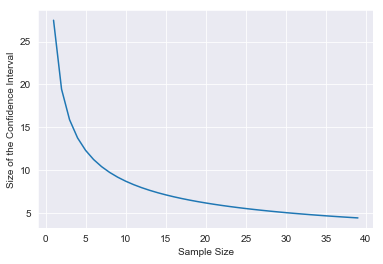

In [76]:
sample_sizes = 40
con_int_compounded = []
confidence_level = 0.95
z = stats.norm.interval(confidence_level)[1] 

for i in range(sample_sizes):
    marg_of_error = stdev_presidents / np.sqrt(i)
    con_int = [sample_mean - (z * marg_of_error) , sample_mean + (z * marg_of_error)]
    con_int_compounded.append(con_int[1] - con_int[0])
    
#plt.title('Margin of Error for US Presidents Data')
plt.ylabel('Size of the Confidence Interval')
plt.xlabel('Sample Size')
sns.lineplot(data=pd.Series(con_int_compounded))
plt.show()

What does this mean in plain English?

**The more data the better!**

## Confidence Intervals: Unknown Population Standard Deviation

So far, we have discussed examples in which the standard deviation of the population was known.

In reality, however, this population parameter is often not known. 

Not knowing the population standard deviation, of course, adds another layer of uncertainty. 

Luckily there's a specific type of distribution that can help us with that! 

### Student's t Distribution

If we do not know the population standard deviation, we cannot rely on a z-test that assumes a Gaussian which assumes that we know the population standard deviation. 

For this reason, we can rely on another distribution to carry out our test, **Student's t-distribution.**

The t-distribution is very similar to the normal distribution. The only parameter we need to know to use the t-distribution is the **degrees of freedom.**

What does a degrees of freedom mean? 

Essentially it is nothing more than the following :


$$df = 1 - \text{n},$$ where $n$ is the sample size. 

As such, it expresses the idea that with a larger sample size (i.e. higher degree of freedom), we have more certainty.

Let's look at a visual example.

In [77]:
from scipy.stats import t

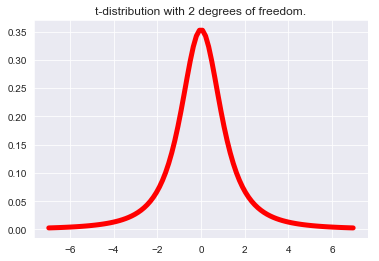

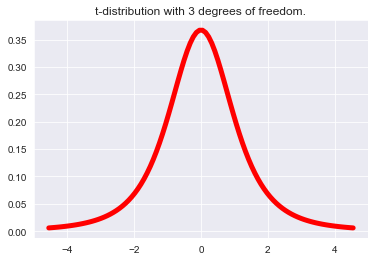

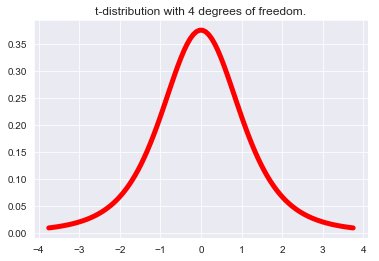

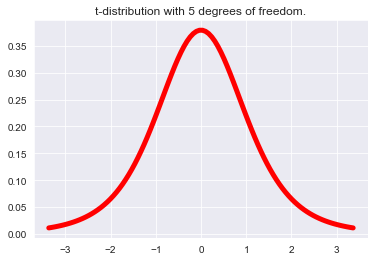

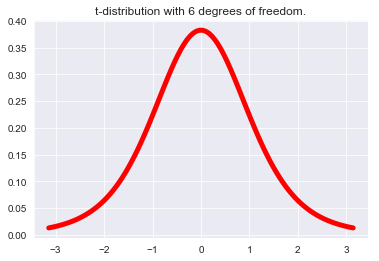

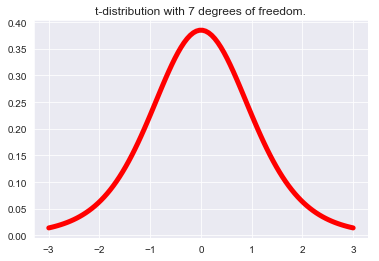

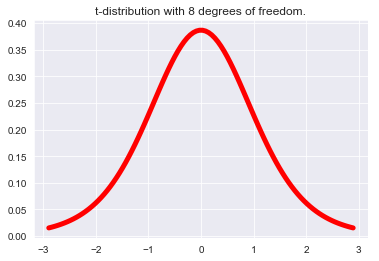

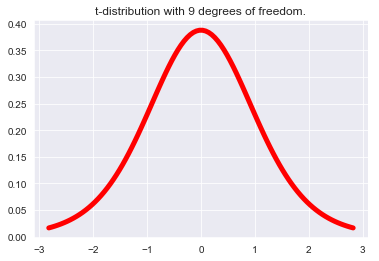

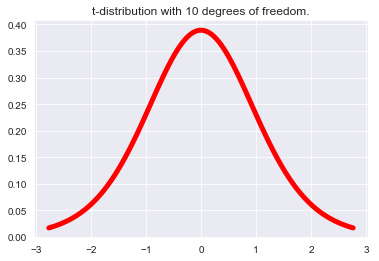

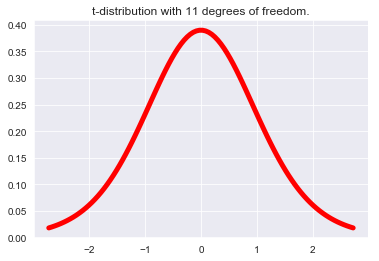

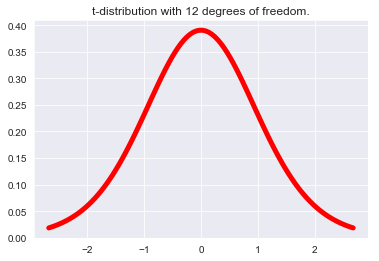

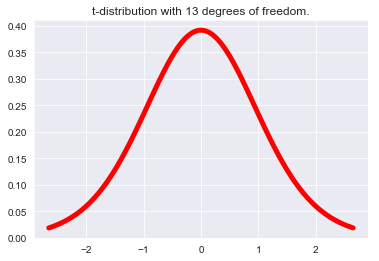

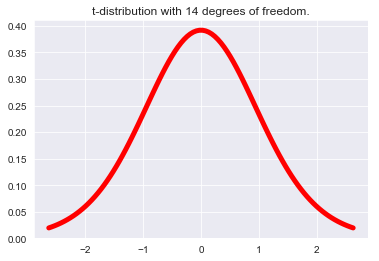

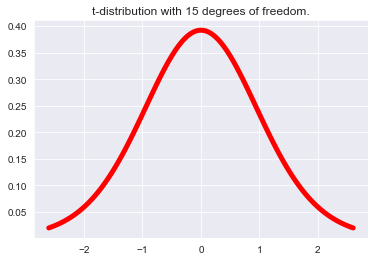

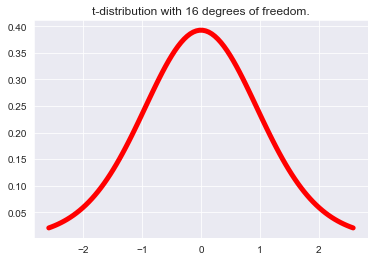

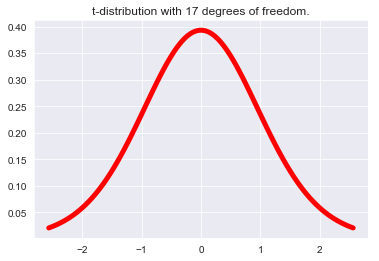

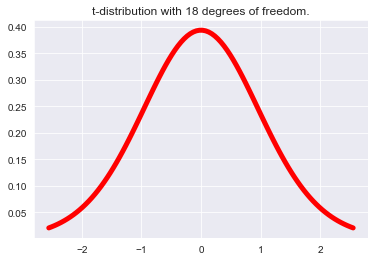

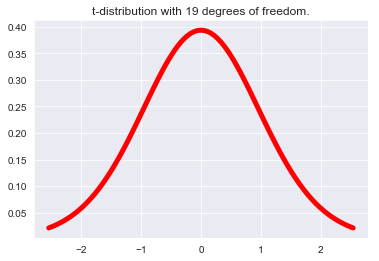

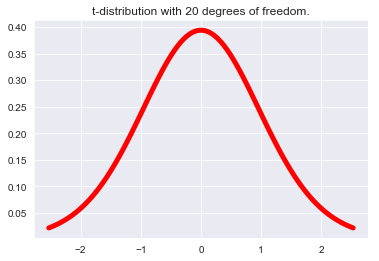

In [78]:
# From t to normal
for i in range(2,21):
    df = i
    fig, ax = plt.subplots(1, 1)
    mean, var, skew, kurt = t.stats(df, moments='mvsk')
    x = np.linspace(t.ppf(0.01, df),t.ppf(0.99, df), 100)
    ax.plot(x, t.pdf(x, df),'r-', lw=5)
    plt.title('t-distribution with ' + str(df) + ' degrees of freedom.')
    plt.show() 
    

T-distributions with a *lower* degree of freedom have *thicker* tails than the t-distributions with a *higher* degree of freedom. 

As you can see, **the higher the number of degrees of freedom the more the t-distribution converges towards a standard normal distribution.**

### Confidence Interval with a t-statistic

As before, we can use the scipy.stats module to compute a cut-off score. 

This time, however, we do not use the z-score, but the t-score.

In [79]:
# degrees of freedom
df = 2
stats.t.interval(0.95, df)  

(-4.302652729911275, 4.302652729911275)

Let us plot how the value for t changes as the degrees of freedom increase.

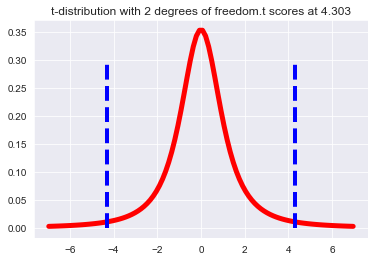

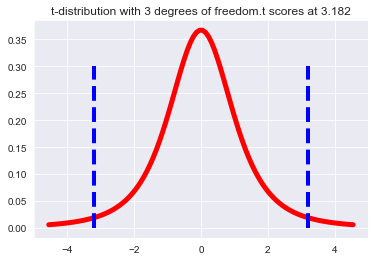

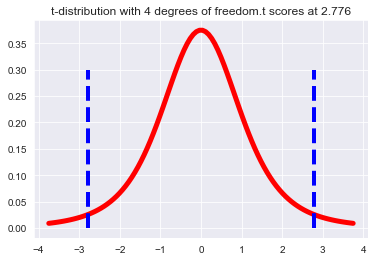

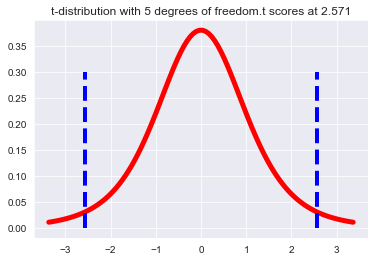

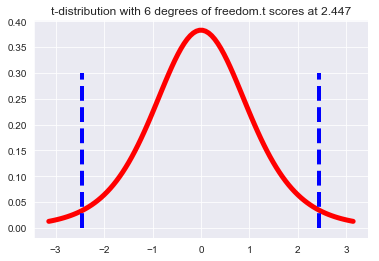

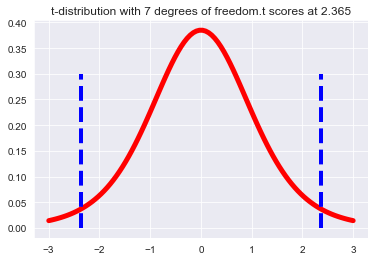

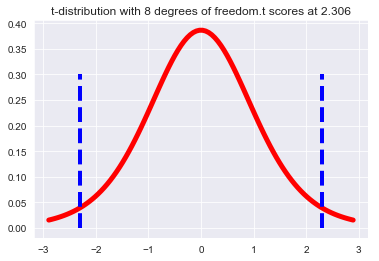

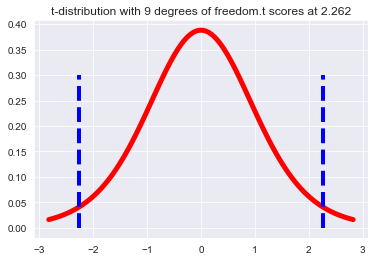

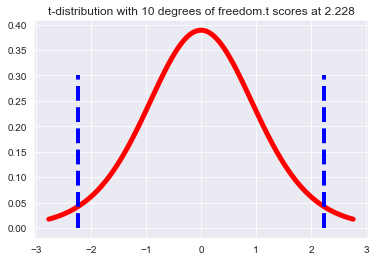

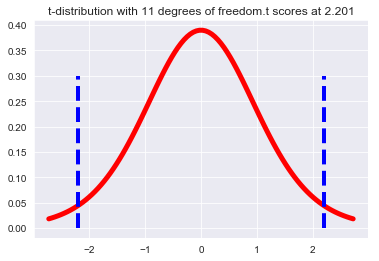

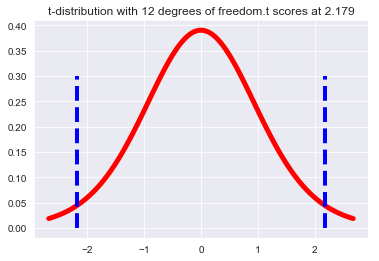

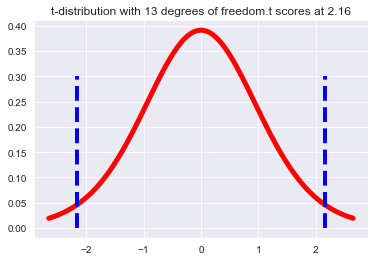

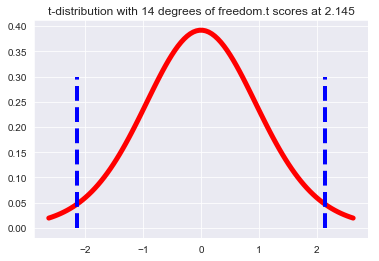

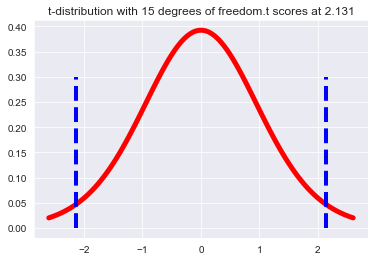

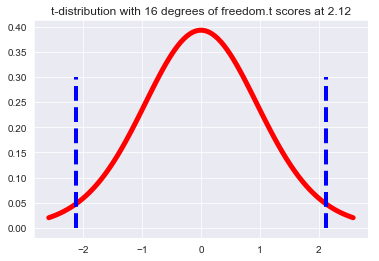

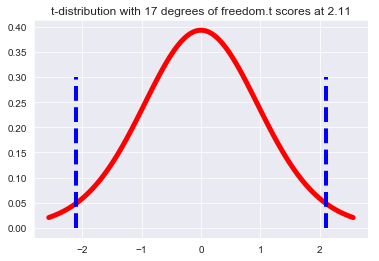

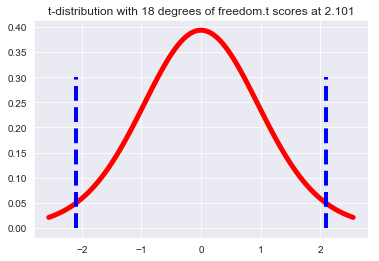

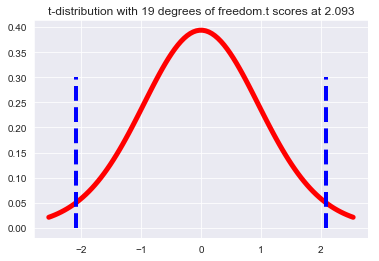

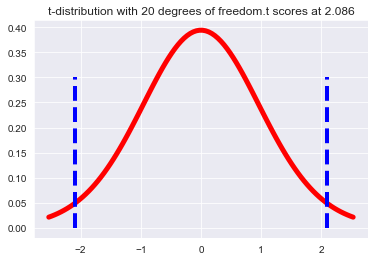

In [80]:
# t-scores on t-dist
for i in range(2,21):
    df = i
    fig, ax = plt.subplots(1, 1)
    mean, var, skew, kurt = t.stats(df, moments='mvsk')
    x = np.linspace(t.ppf(0.01, df),t.ppf(0.99, df), 100)
    ax.plot(x, t.pdf(x, df),'r-', lw=5)
    
    t_left = stats.t.interval(0.95, df)[0]
    t_right = stats.t.interval(0.95, df)[1]
    plt.plot([t_left, t_left], [0, 0.3], 'k--', lw=4, color='b')
    plt.plot([t_right, t_right], [0, 0.3], 'k--', lw=4, color='b')
    
    plt.title('t-distribution with ' + str(df) + ' degrees of freedom.' + 't scores at ' + str(round(t_right,3)))
    plt.show()
    

As you will see, the t-score decreases as the degrees of freedom (i.e. sample size) increases. 

Also, as the degrees of freedom increase, more data is 'squeezed' in between the two blue lines. 

By extent, if the degrees of freedom get really large, the t-score will be equal to the z-score. 

In [84]:
df = 40000
print('t', stats.t.interval(0.95, df)[1])
print('z:',stats.norm.interval(0.95)[1])

t 1.9600232930849129
z: 1.959963984540054


### Standard Error

As with the z-score, t-test needs to be 'adjusted' for the data at hand.

Suppose we have the following data set.

In [85]:
spotify = pd.read_csv('spotify.csv')

We now want to compute a confidence interval for the population mean of accousticness. Hence, we assume that this is our sample.

In [87]:
acoustic = spotify['acousticness']
acoustic.head()

0    0.494780
1    0.679245
2    0.621532
3    0.359395
4    0.353347
Name: acousticness, dtype: float64

Assume that we want to be 99% confident that the true mean lies within the interval.

In [88]:
df = len(acoustic) - 1

In [89]:
t_left = stats.t.interval(0.99, df)[1]
t_right = stats.t.interval(0.99, df)[0]

Let's now add the sample mean to these values. 

In [90]:
t_right - acoustic.mean(), acoustic.mean() + t_left

(-2.976736785120161, 2.976736785120161)

Do these values seem right given that acoustic is measured on a scale from 0 to 1?

No. Obviously, we need to adjust for a margin of error. 

Contrary to what we have seen before, the 'margin of error' for a t-test is called the **standard error**. It can be computed as follows:

$$\text{se} = \frac{s}{\sqrt{n}},$$ where $s$ denotes the standard deviation of the sample and $n$ denotes the sample size. 

In [91]:
se = acoustic.std() / np.sqrt(len(acoustic))
print(se)

0.006082610142463623


Let's now put all the ingredients together.

### Confidence Interval for the t-Test

Wrapping things up, we can compute the confidende interval for a variable as follows:

$$\bar{X} \pm t \times \frac{s}{\sqrt{n}},$$ where $t$ is the t-score we computed above, $s$ is the sample standard deviation, $n$ is the sample size (these to terms make up the standard error) and $\bar{X}$ is the mean of the sample.

Thus, for the 99% confidence interval for our Spotify-accousticness, we have:

In [99]:
# Sample
acoustic = spotify['acousticness']

In [104]:
# Degrees of freedom 
df = len(acoustic) - 1 
df

2663

In [105]:
# t-score
t = stats.t.interval(0.99, df)[1]
# X_bar
sample_mean = acoustic.mean() 
# Standard error
standard_error = acoustic.std() / np.sqrt(len(acoustic))

In [106]:
con_int = [sample_mean - (t * standard_error) , sample_mean + (t * standard_error)]
print('With 99 % confidence, the true mean lies in the inverval:', con_int)

With 99 % confidence, the true mean lies in the inverval: [0.38338098817020555, 0.4147389941918203]


## Summary

In this lesson we learnt:

- What confidence intervals are;

- How to compute confidence intervals;

- The difference between t-scores ($\sigma$ not known) and z-scores ($\sigma$ known).